In [ ]:
import pandas as pd
df = pd.read_csv('rfm_view.csv')

In [ ]:
df.head()

,cust_id,recency,frequency,monetary
0,12346.0,272,2,0.00
1,12347.0,2,7,4310.00
2,12348.0,65,4,1797.24
3,12349.0,16,1,1757.55
4,12350.0,259,1,334.40


In [ ]:
#rfm Analysis for customer segmentation

In [ ]:
df.shape

(4373, 4)

In [ ]:
df['cust_id'].nunique()

4372

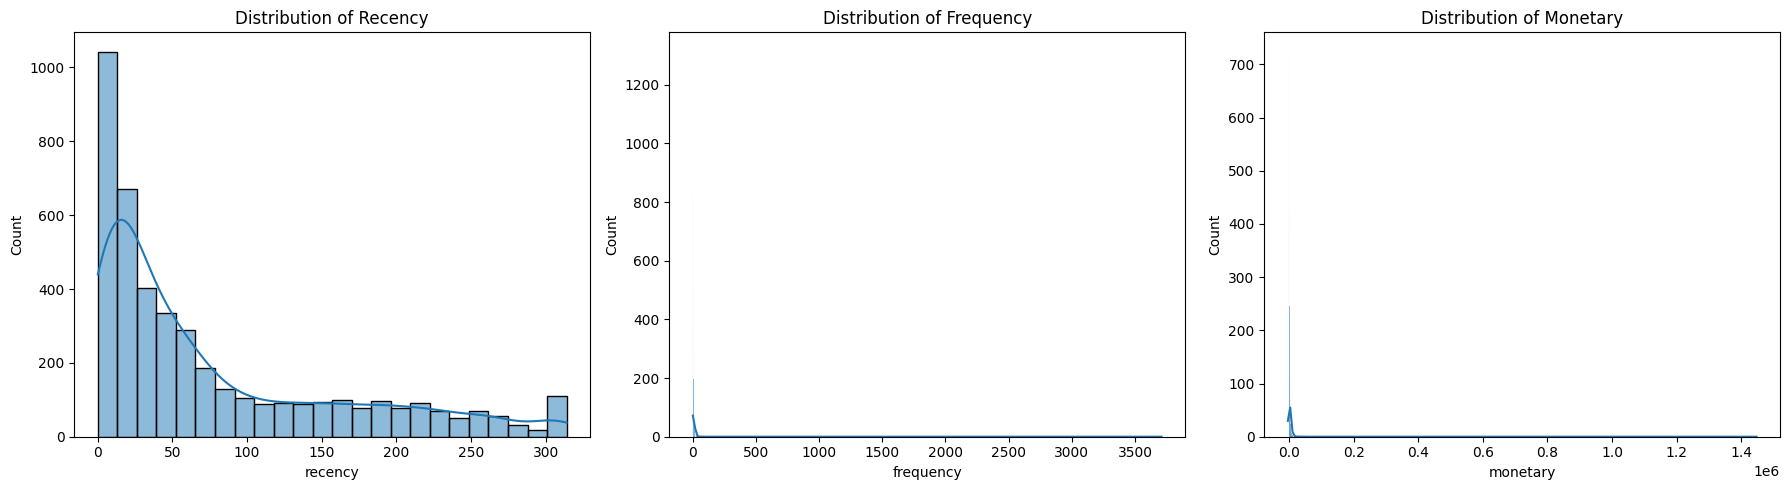

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(data=df, x='recency', ax=axes[0], kde=True)
axes[0].set_title('Distribution of Recency')

sns.histplot(data=df, x='frequency', ax=axes[1], kde=True)
axes[1].set_title('Distribution of Frequency')

sns.histplot(data=df, x='monetary', ax=axes[2], kde=True)
axes[2].set_title('Distribution of Monetary')

plt.tight_layout()
plt.show()

In [ ]:
#plot the boxplot for frequency and monetary
import plotly.express as px

fig = px.box(df, x="frequency", title="Box Plot of Frequency")
fig.show()

fig = px.box(df, x="monetary", title="Box Plot of Monetary")
fig.show()

In [ ]:
# Identify and remove outliers (example: values above a certain percentile)
Q1_freq = df['frequency'].quantile(0.25)
Q3_freq = df['frequency'].quantile(0.75)
IQR_freq = Q3_freq - Q1_freq
df_filtered = df[~((df['frequency'] < (Q1_freq - 1.5 * IQR_freq)) | (df['frequency'] > (Q3_freq + 1.5 * IQR_freq)))]

Q1_monetary = df_filtered['monetary'].quantile(0.25)
Q3_monetary = df_filtered['monetary'].quantile(0.75)
IQR_monetary = Q3_monetary - Q1_monetary
df_filtered = df_filtered[~((df_filtered['monetary'] < (Q1_monetary - 1.5 * IQR_monetary)) | (df_filtered['monetary'] > (Q3_monetary + 1.5 * IQR_monetary)))]

print(f"Original shape: {df.shape}")
print(f"Filtered shape: {df_filtered.shape}")

Original shape: (4373, 4)
Filtered shape: (3685, 4)


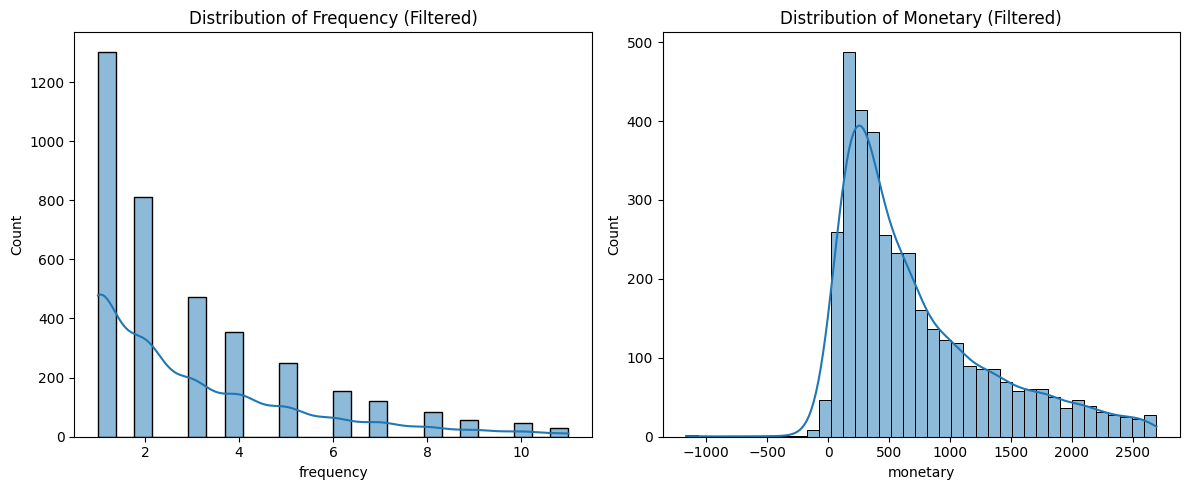

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(data=df_filtered, x='frequency', ax=axes[0], kde=True)
axes[0].set_title('Distribution of Frequency (Filtered)')

sns.histplot(data=df_filtered, x='monetary', ax=axes[1], kde=True)
axes[1].set_title('Distribution of Monetary (Filtered)')

plt.tight_layout()
plt.show()

In [ ]:
# Impute outliers with the median (example)
median_freq = df['frequency'].median()
median_monetary = df['monetary'].median()

# Identify outliers using IQR
Q1_freq = df['frequency'].quantile(0.25)
Q3_freq = df['frequency'].quantile(0.75)
IQR_freq = Q3_freq - Q1_freq
outlier_freq_indices = df[(df['frequency'] < (Q1_freq - 1.5 * IQR_freq)) | (df['frequency'] > (Q3_freq + 1.5 * IQR_freq))].index

Q1_monetary = df['monetary'].quantile(0.25)
Q3_monetary = df['monetary'].quantile(0.75)
IQR_monetary = Q3_monetary - Q1_monetary
outlier_monetary_indices = df[(df['monetary'] < (Q1_monetary - 1.5 * IQR_monetary)) | (df['monetary'] > (Q3_monetary + 1.5 * IQR_monetary))].index

# Impute outliers with the median
df_imputed = df.copy()
df_imputed.loc[outlier_freq_indices, 'frequency'] = median_freq
df_imputed.loc[outlier_monetary_indices, 'monetary'] = median_monetary

print("Original data info:")
df.info()
print("\nImputed data info:")
df_imputed.info()

Original data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4373 entries, 0 to 4372
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cust_id    4372 non-null   float64
 1   recency    4373 non-null   int64  
 2   frequency  4373 non-null   int64  
 3   monetary   4373 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 136.8 KB

Imputed data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4373 entries, 0 to 4372
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cust_id    4372 non-null   float64
 1   recency    4373 non-null   int64  
 2   frequency  4373 non-null   int64  
 3   monetary   4373 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 136.8 KB


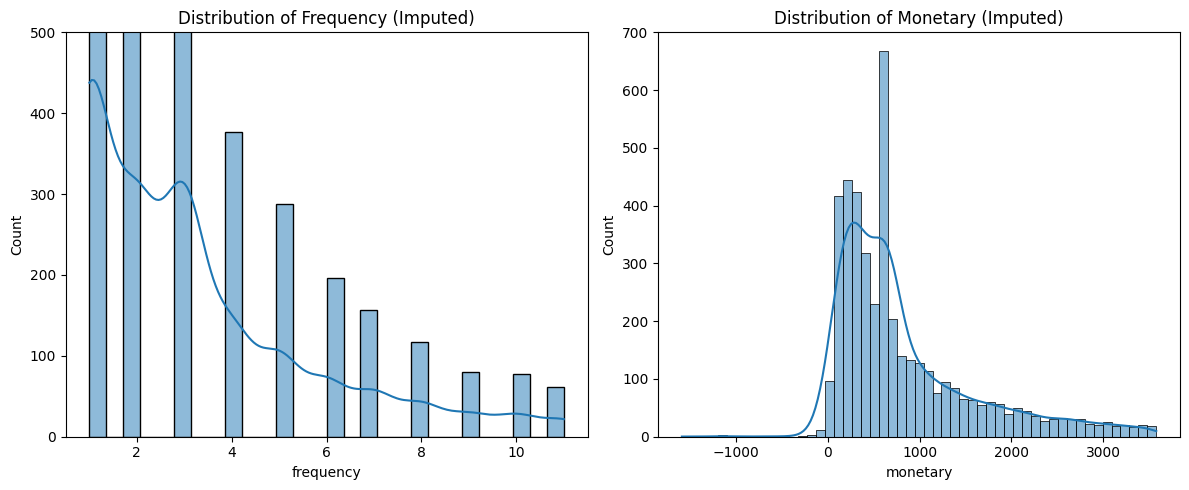

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(data=df_imputed, x='frequency', ax=axes[0], kde=True)
axes[0].set_title('Distribution of Frequency (Imputed)')
axes[0].set_ylim(0, 500)


sns.histplot(data=df_imputed, x='monetary', ax=axes[1], kde=True)
axes[1].set_title('Distribution of Monetary (Imputed)')
axes[1].set_ylim(0, 700)


plt.tight_layout()
plt.show()

In [ ]:
df_filtered_conditions = df[(df['monetary'] >= 0) & (df['monetary'] <= 2500) & (df['frequency'] < 9)].copy()

print("Original shape:", df.shape)
print("Filtered shape:", df_filtered_conditions.shape)
display(df_filtered_conditions.head())

Original shape: (4373, 4)
Filtered shape: (3474, 4)


,cust_id,recency,frequency,monetary
0,12346.0,272,2,0.00
2,12348.0,65,4,1797.24
3,12349.0,16,1,1757.55
4,12350.0,259,1,334.40
6,12353.0,173,1,89.00


In [ ]:
import plotly.express as px

fig = px.box(df_filtered_conditions, y="recency", title="Box Plot of Recency")
fig.show()

In [ ]:
import plotly.express as px

fig = px.box(df_filtered_conditions, y="frequency", title="Box Plot of Frequency")
fig.show()

fig = px.box(df_filtered_conditions, y="monetary", title="Box Plot of Monetary")
fig.show()

# Task
Create a k means model on the df_filtered_conditions data set using the columns 'recency', 'frequency', and 'monetary'. Determine the optimal number of clusters, apply the k-means algorithm, add the cluster labels to the dataframe, and analyze and visualize the clusters.

## Data preparation

### Subtask:
Select the relevant columns for clustering ('recency', 'frequency', 'monetary') from `df_filtered_conditions` and scale them to ensure equal contribution to the clustering process.


**Reasoning**:
Select the relevant columns and scale them for clustering.



In [ ]:
from sklearn.preprocessing import StandardScaler

df_rfm = df_filtered_conditions[['recency', 'frequency', 'monetary']]

scaler = StandardScaler()
df_rfm_scaled = pd.DataFrame(scaler.fit_transform(df_rfm), columns=df_rfm.columns)

display(df_rfm_scaled.head())

,recency,frequency,monetary
0,2.124497,-0.349811,-1.207948
1,-0.280018,0.733777,2.062091
2,-0.849203,-0.891606,1.989875
3,1.973489,-0.891606,-0.599514
4,0.974511,-0.891606,-1.046014


## Determine optimal number of clusters

### Subtask:
Use the Elbow method or Silhouette score to find the optimal number of clusters for the K-Means algorithm.


**Reasoning**:
Calculate SSE and silhouette scores for different numbers of clusters to determine the optimal number of clusters using both the Elbow and Silhouette methods.



ValueError: x and y must have same first dimension, but have shapes (8,) and (9,)

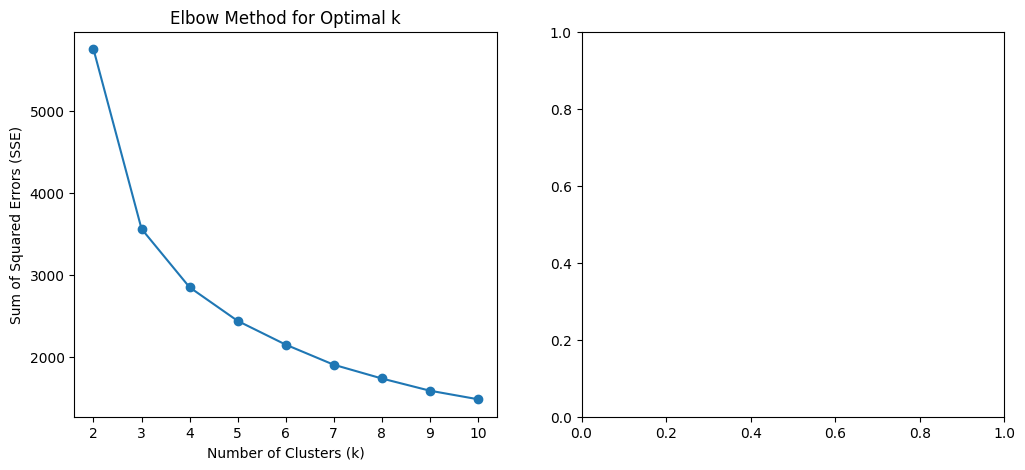

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

sse = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_rfm_scaled)
    sse.append(kmeans.inertia_)
    if k > 1:
        score = silhouette_score(df_rfm_scaled, kmeans.labels_)
        silhouette_scores.append(score)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, sse, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.xticks(k_range)

plt.subplot(1, 2, 2)
plt.plot(k_range[1:], silhouette_scores, marker='o')
plt.title('Silhouette Scores for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_range[1:])

plt.tight_layout()
plt.show()

**Reasoning**:
The previous code failed because the x-axis range for the silhouette plot was incorrect. The silhouette scores list has one less element than the k_range because the silhouette score is not defined for k=1. I will fix the x-axis range for the silhouette plot.



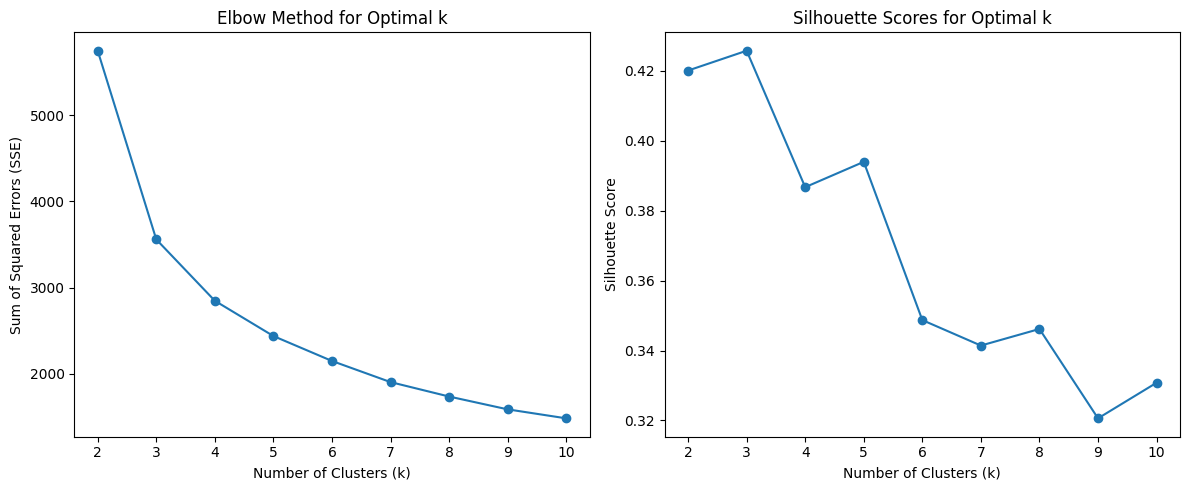

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

sse = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_rfm_scaled)
    sse.append(kmeans.inertia_)
    score = silhouette_score(df_rfm_scaled, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, sse, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.xticks(k_range)

plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_range)

plt.tight_layout()
plt.show()

## Apply k-means clustering

### Subtask:
Apply the K-Means algorithm with the optimal number of clusters to the scaled data.


**Reasoning**:
Apply the K-Means algorithm with the optimal number of clusters (k=4) to the scaled data.



In [ ]:
from sklearn.cluster import KMeans

k = 4
kmeans_model = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans_model.fit(df_rfm_scaled)

KMeans(n_clusters=4, n_init=10, random_state=42)

## Add cluster labels

### Subtask:
Add the cluster labels obtained from the K-Means model back to the `df_filtered_conditions` DataFrame.


**Reasoning**:
Add the cluster labels from the fitted K-Means model to the original filtered dataframe.



In [ ]:
df_filtered_conditions['cluster_label'] = kmeans_model.labels_
display(df_filtered_conditions.head())

,cust_id,recency,frequency,monetary,cluster_label
0,12346.0,272,2,0.00,1
2,12348.0,65,4,1797.24,3
3,12349.0,16,1,1757.55,0
4,12350.0,259,1,334.40,1
6,12353.0,173,1,89.00,1


In [ ]:
df_filtered_conditions.sample(10)

,cust_id,recency,frequency,monetary,cluster_label
1577,14480.0,10,1,279.05,2
591,13118.0,17,7,1125.00,3
3009,16414.0,18,2,126.25,2
1414,14247.0,232,1,136.77,1
1436,14285.0,18,4,1910.01,3
2982,16378.0,205,3,362.95,1
2811,16147.0,113,1,375.00,2
60,12422.0,82,3,803.56,0
2610,15864.0,19,8,1769.78,3
4345,18249.0,15,1,95.34,2


## Analyze and visualize clusters

### Subtask:
Analyze the characteristics of each cluster and visualize the clusters using scatter plots or other appropriate visualizations.


**Reasoning**:
Calculate the mean RFM values for each cluster and visualize the clusters using a 3D scatter plot as requested in the instructions.



In [ ]:
cluster_analysis = df_filtered_conditions.groupby('cluster_label')[['recency', 'frequency', 'monetary']].mean()
display(cluster_analysis)

import plotly.express as px

fig = px.scatter_3d(df_filtered_conditions, x='recency', y='frequency', z='monetary',
                    color='cluster_label', title='Customer Segments by RFM')

fig.update_layout(scene = dict(
                    xaxis_title='Recency',
                    yaxis_title='Frequency',
                    zaxis_title='Monetary'))

fig.show()

,recency,frequency,monetary
cluster_label,,,
0,48.060642,3.662307,893.817470
1,217.772831,1.472603,335.955616
2,48.187845,1.560379,353.340774
3,35.332653,5.804082,1658.574633


## Summary:

### Data Analysis Key Findings
* The optimal number of clusters for the K-Means algorithm on the scaled RFM data is determined to be 4, based on the Elbow method and Silhouette score analysis.
* The K-Means model was successfully fitted to the scaled data, and the resulting cluster labels were added to the `df_filtered_conditions` DataFrame.
* The analysis of the clusters revealed distinct customer segments based on their recency, frequency, and monetary values, which were visualized in a 3D scatter plot.

### Insights or Next Steps
* Based on the cluster analysis, targeted marketing campaigns can be designed for each customer segment to improve engagement and sales.


# Task
Build a decision tree using cluster label as a target and other columns a features except cust_id up to 2 levels and visualize using cparty on the df_filtered_conditions data set.

## Prepare data for decision tree

### Subtask:
Separate the features (recency, frequency, monetary) and the target variable (cluster_label) from the `df_filtered_conditions` DataFrame.


**Reasoning**:
Separate the features and target variable for the decision tree model.



In [ ]:
X = df_filtered_conditions[['recency', 'frequency', 'monetary']]
y = df_filtered_conditions['cluster_label']

display(X.head())
display(y.head())

,recency,frequency,monetary
0,272,2,0.00
2,65,4,1797.24
3,16,1,1757.55
4,259,1,334.40
6,173,1,89.00


,cluster_label
0,1
2,3
3,0
4,1
6,1


## Split data

### Subtask:
Split the data into training and testing sets to evaluate the model performance.


**Reasoning**:
Split the features and target into training and testing sets for model evaluation.



In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (2779, 3)
Shape of X_test: (695, 3)
Shape of y_train: (2779,)
Shape of y_test: (695,)


## Build decision tree model

### Subtask:
Train a decision tree classifier with a maximum depth of 2 on the training data.


**Reasoning**:
Import DecisionTreeClassifier, instantiate the model with max_depth=2 and random_state=42, and fit it to the training data.



In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(max_depth=2, random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

## Visualize decision tree

### Subtask:
Visualize the trained decision tree using the `cparty` library.


**Reasoning**:
Visualize the trained decision tree using the cparty library with specified parameters for clarity and information.



**Reasoning**:
The previous command failed because the `cparty` library is not installed. I need to install the `cparty` library using pip.



**Reasoning**:
The installation of `cparty` failed, indicating that the library might not be available or named differently. I will try visualizing the decision tree using `sklearn.tree.plot_tree` instead, which is a standard way to visualize decision trees in scikit-learn.



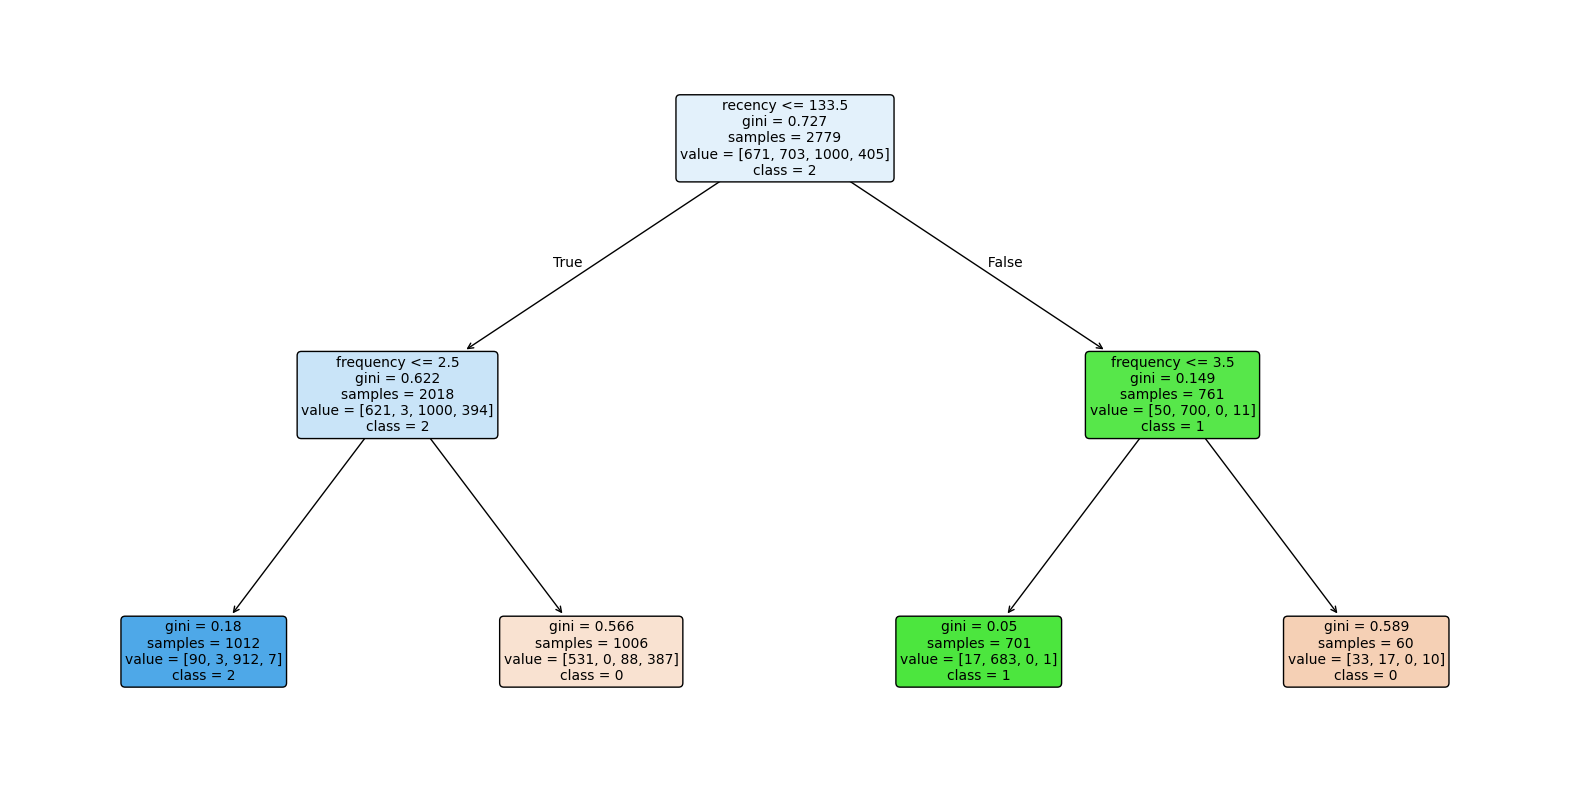

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(dt_model,
          feature_names=X_train.columns.tolist(),
          class_names=[str(c) for c in sorted(y_train.unique())],
          filled=True,
          rounded=True,
          fontsize=10)
plt.show()

## Evaluate model (optional)

### Subtask:
Evaluate the performance of the decision tree model on the testing set.


**Reasoning**:
Evaluate the performance of the decision tree model on the testing set using accuracy, precision, recall, and F1-score and display the results.



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = dt_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.7899
Precision: 0.7191
Recall: 0.7899
F1-score: 0.7484


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



## Summary:

### Data Analysis Key Findings

*   The data was successfully split into training and testing sets, with 80% for training and 20% for testing.
*   A decision tree classifier was trained with a maximum depth of 2 using the training data.
*   The trained decision tree model achieved an accuracy of 0.7899 on the testing set.
*   The model's weighted precision was 0.7191, weighted recall was 0.7899, and weighted F1-score was 0.7484.
*   An `UndefinedMetricWarning` during precision calculation suggests that the model did not predict any samples for at least one class in the test set.
*   Visualization of the decision tree showed how the features (recency, frequency, monetary) are used to split the data into different cluster labels up to two levels.

### Insights or Next Steps

*   Investigate the classes that the model failed to predict (as indicated by the `UndefinedMetricWarning`) to understand if there's a data imbalance issue or if those classes are inherently difficult to distinguish with the current features.
*   Consider exploring decision trees with a slightly larger `max_depth` or using techniques like cross-validation to potentially improve model performance and robustness.


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
display(conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:


array([[139,   7,  24,   0],
       [  4, 169,   0,   0],
       [ 25,   1, 241,   0],
       [ 82,   1,   2,   0]])


Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.82      0.66       170
           1       0.95      0.98      0.96       173
           2       0.90      0.90      0.90       267
           3       0.00      0.00      0.00        85

    accuracy                           0.79       695
   macro avg       0.60      0.67      0.63       695
weighted avg       0.72      0.79      0.75       695



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



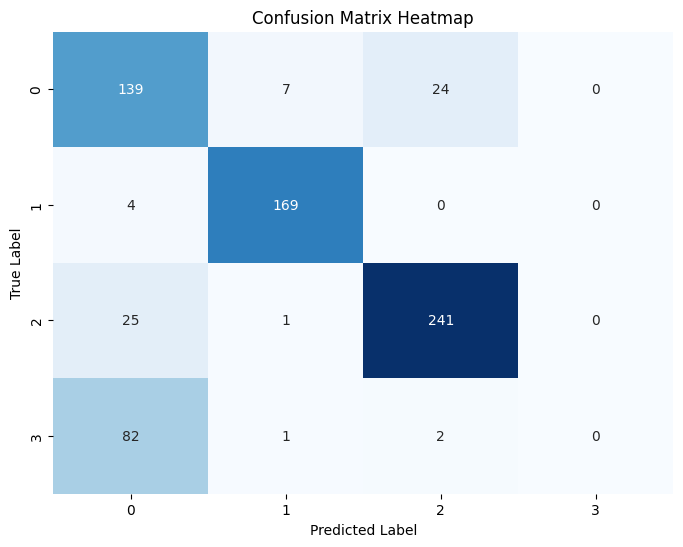

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

# Task
Develop PCA for rmf variables and create a dataframe along with the features we have.

## Select rfm features

### Subtask:
Select the 'recency', 'frequency', and 'monetary' columns from the `df_filtered_conditions` DataFrame.


**Reasoning**:
Select the 'recency', 'frequency', and 'monetary' columns from the `df_filtered_conditions` DataFrame and display the head of the new DataFrame.



In [ ]:
df_rfm_pca = df_filtered_conditions[['recency', 'frequency', 'monetary']].copy()
display(df_rfm_pca.head())

,recency,frequency,monetary
0,272,2,0.00
2,65,4,1797.24
3,16,1,1757.55
4,259,1,334.40
6,173,1,89.00


## Apply pca

### Subtask:
Apply PCA to the scaled RFM data and determine the number of components to retain (e.g., based on explained variance).


**Reasoning**:
Apply PCA to the scaled RFM data and determine the number of components to retain based on explained variance by plotting the cumulative explained variance.



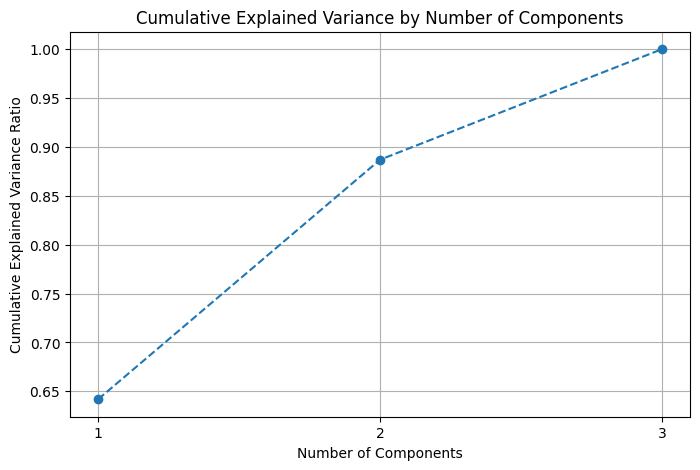

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(df_rfm_scaled)

cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.xticks(range(1, len(cumulative_explained_variance) + 1))
plt.grid(True)
plt.show()

**Reasoning**:
Based on the cumulative explained variance plot, it appears that 2 components explain a significant portion of the variance. I will now apply PCA with 2 components and transform the scaled data.



In [ ]:
pca = PCA(n_components=3)
df_rfm_pca_components = pca.fit_transform(df_rfm_scaled)

print("Shape of PCA transformed data:", df_rfm_pca_components.shape)

Shape of PCA transformed data: (3474, 3)


## Create a new dataframe

### Subtask:
Create a new DataFrame that includes the original `df_filtered_conditions` DataFrame and the generated PCA components.


**Reasoning**:
I will create a new DataFrame from the PCA components, reset the index of the original filtered DataFrame, and then concatenate them to create a combined DataFrame as requested.



In [ ]:
df_pca_components = pd.DataFrame(df_rfm_pca_components, columns=['PCA1', 'PCA2','PCA3'])
df_filtered_conditions_reset = df_filtered_conditions.reset_index(drop=True)
df_rfm_pca_combined = pd.concat([df_filtered_conditions_reset, df_pca_components], axis=1)
display(df_rfm_pca_combined.head())

,cust_id,recency,frequency,monetary,cluster_label,PCA1,PCA2,PCA3
0,12346.0,272,2,0.00,1,-1.970025,1.299593,0.724605
1,12348.0,65,4,1797.24,3,1.864493,0.758497,-0.904104
2,12349.0,16,1,1757.55,0,1.065854,-0.227520,-2.070725
3,12350.0,259,1,334.40,1,-1.865092,1.249519,-0.095771
4,12353.0,173,1,89.00,1,-1.667045,0.199718,0.140902


## Summary:

### Data Analysis Key Findings

*   The 'recency', 'frequency', and 'monetary' columns were successfully selected from the original data to create a new DataFrame `df_rfm_pca`.
*   Applying PCA to the scaled RFM data revealed that 2 components explain a significant portion of the total variance.
*   The scaled RFM data was successfully transformed into a 2-component space using PCA, resulting in a transformed dataset with a shape of (3474, 2).
*   A new DataFrame was successfully created by combining the original filtered data with the two PCA components ('PCA1' and 'PCA2').

### Insights or Next Steps

*   The PCA components can be used as features in subsequent analyses, such as clustering or classification, to potentially improve model performance and interpretability by reducing dimensionality while retaining important variance.
*   Further analysis of the PCA component loadings could provide insights into how the original RFM variables contribute to the principal components, helping to understand the underlying patterns in the customer data.


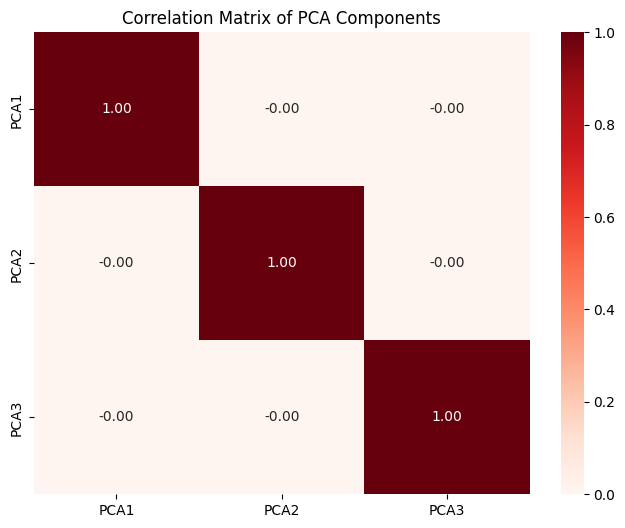

In [ ]:
correlation_matrix = df_pca_components.corr()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Reds', fmt=".2f", cbar=True)
plt.title('Correlation Matrix of PCA Components')
plt.show()

In [ ]:
from sklearn.cluster import KMeans

kmeans_pca = KMeans(n_clusters=5, random_state=42, n_init=10)
kmeans_pca.fit(df_pca_components)

KMeans(n_clusters=5, n_init=10, random_state=42)

In [ ]:
df_pca_components['pca_cluster_label'] = kmeans_pca.labels_
display(df_pca_components.head())

,PCA1,PCA2,PCA3,pca_cluster_label
0,-1.970025,1.299593,0.724605,2
1,1.864493,0.758497,-0.904104,4
2,1.065854,-0.227520,-2.070725,4
3,-1.865092,1.249519,-0.095771,2
4,-1.667045,0.199718,0.140902,2


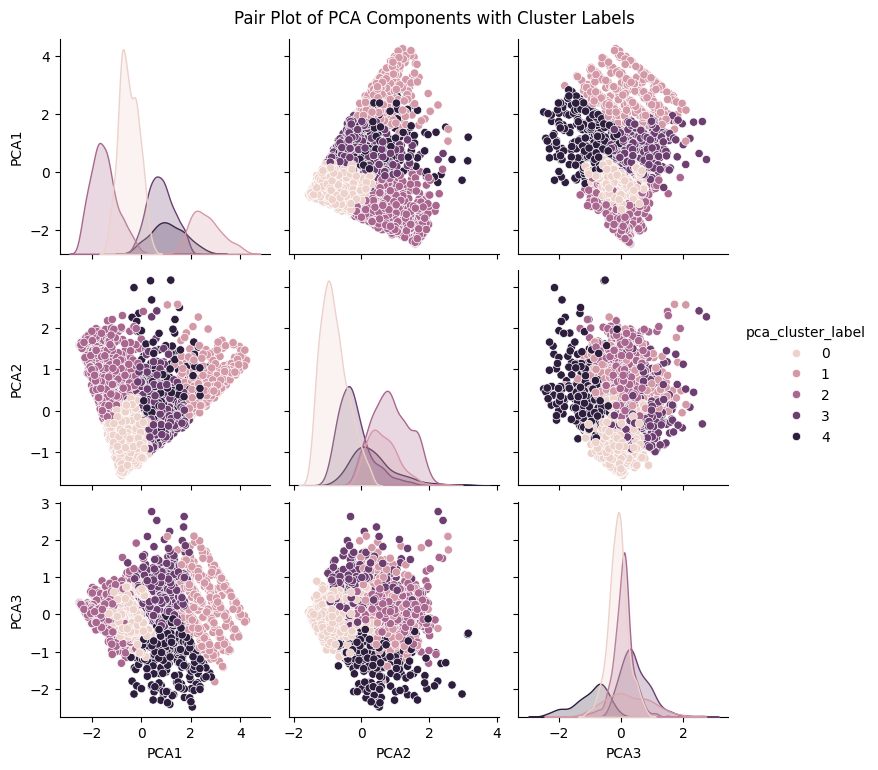

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df_pca_components, hue='pca_cluster_label', diag_kind='kde')
plt.suptitle('Pair Plot of PCA Components with Cluster Labels', y=1.02)
plt.show()

In [ ]:
X = df_filtered_conditions[['recency', 'frequency', 'monetary']]
y = df_filtered_conditions['cluster_label']

display(X.head())
display(y.head())

,recency,frequency,monetary
0,272,2,0.00
2,65,4,1797.24
3,16,1,1757.55
4,259,1,334.40
6,173,1,89.00


,cluster_label
0,1
2,3
3,0
4,1
6,1


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (2779, 3)
Shape of X_test: (695, 3)
Shape of y_train: (2779,)
Shape of y_test: (695,)


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

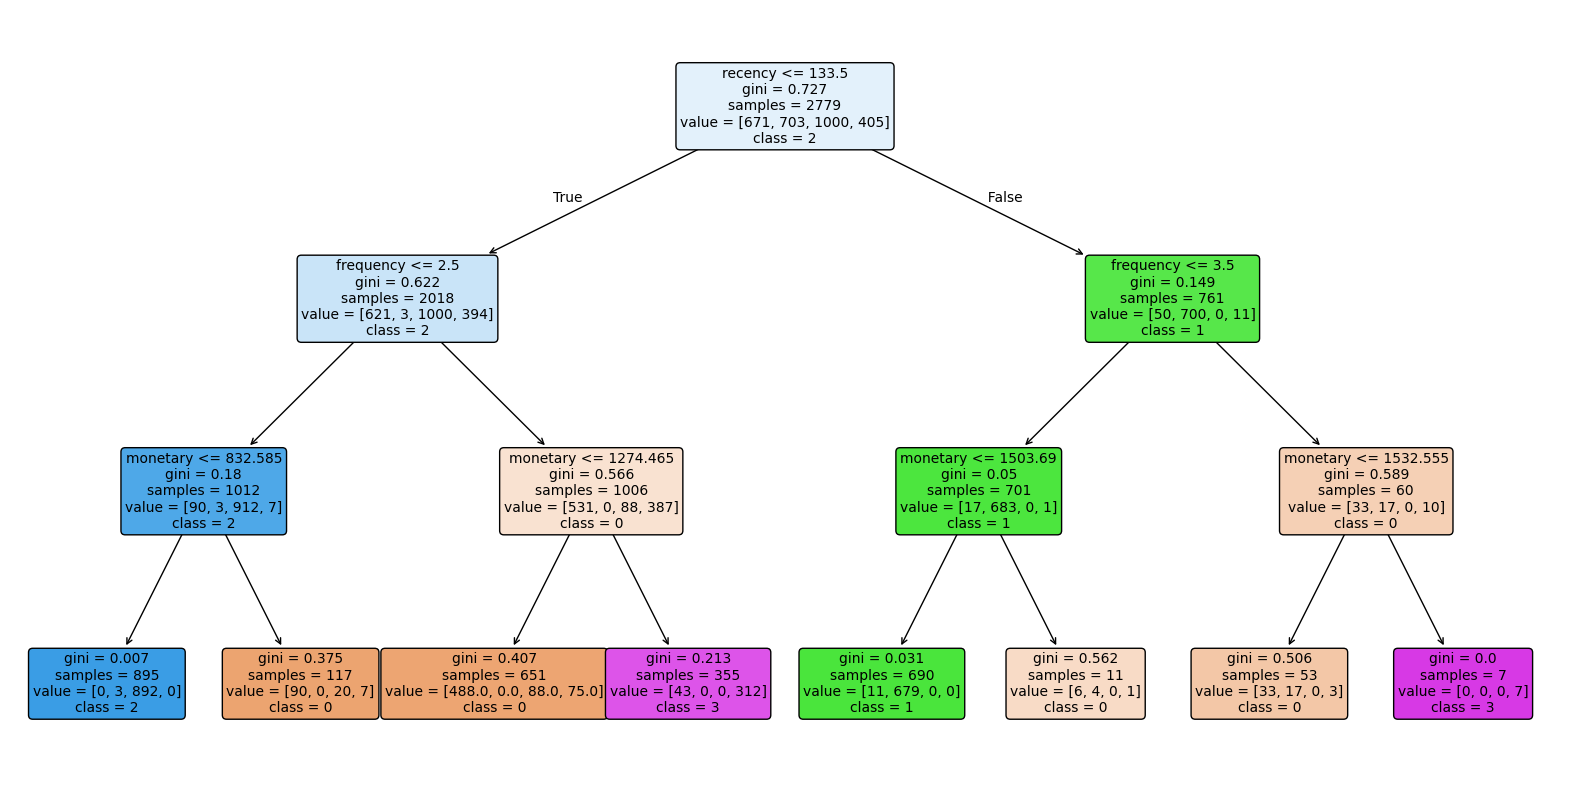

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(dt_model,
          feature_names=X_train.columns.tolist(),
          class_names=[str(c) for c in sorted(y_train.unique())],
          filled=True,
          rounded=True,
          fontsize=10)
plt.show()